C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\User\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{ OUTPUT Z } = 4.0


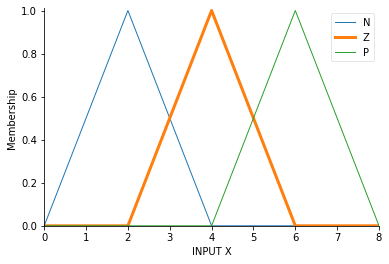

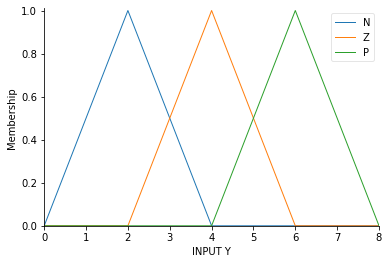

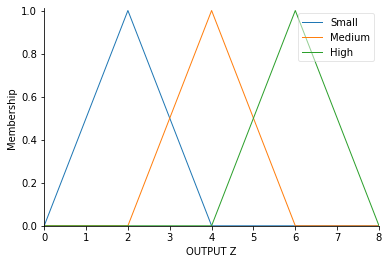

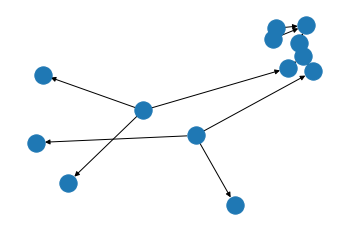

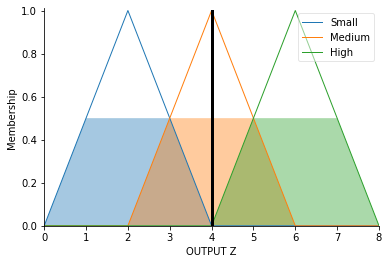

In [4]:

    import numpy as np
    import skfuzzy as fuzz
    from skfuzzy import control as ctrl
    
    # New Antecedent/Consequent objects hold universe variables and membership
    # functions
    InputX = ctrl.Antecedent(np.arange(0, 9, 1), 'INPUT X')
    InputY = ctrl.Antecedent(np.arange(0, 9, 1), 'INPUT Y')
    OutputZ = ctrl.Consequent(np.arange(0, 9, 1), 'OUTPUT Z')
    
    # Auto-membership function population is possible with .automf(3, 5, or 7)
    # quality.automf(3)
    # service.automf(3)
    
    # Custom membership functions can be built interactively with a familiar,
    # Pythonic API
    
    # Graph \INPUT.X\
    InputX['N'] = fuzz.trimf(InputX.universe, [0, 2, 4]) 
    InputX['Z'] = fuzz.trimf(InputX.universe, [2, 4, 6])
    InputX['P'] = fuzz.trimf(InputX.universe, [4, 6, 8])
    
    # Graph \INPUT.Y\ 
    InputY['N'] = fuzz.trimf(InputY.universe, [0, 2, 4])
    InputY['Z'] = fuzz.trimf(InputY.universe, [2, 4, 6])
    InputY['P'] = fuzz.trimf(InputY.universe, [4, 6, 8]) 
    
    # Graph \OUTPUT.Z\ 
    OutputZ['Small'] = fuzz.trimf(OutputZ.universe, [0, 2, 4])
    OutputZ['Medium'] = fuzz.trimf(OutputZ.universe, [2, 4, 6])
    OutputZ['High'] = fuzz.trimf(OutputZ.universe, [4, 6, 8]) 
    
    # You can see how these look with .view()
    InputX['Z'].view()
    InputY.view()
    OutputZ.view()
    
    # Column N
    rule1 = ctrl.Rule(InputX['N'] | InputY['N'], OutputZ['Small'])
    rule2 = ctrl.Rule(InputX['N'] & InputY['Z'], OutputZ['Medium'])
    rule3 = ctrl.Rule(InputX['N'] & InputY['P'], OutputZ['Medium'])
    
    # Column Z
    rule4 = ctrl.Rule(InputX['Z'] & InputY['N'], OutputZ['Medium'])
    rule5 = ctrl.Rule(InputX['Z'] | InputY['Z'], OutputZ['High'])
    rule6 = ctrl.Rule(InputX['Z'] & InputY['P'], OutputZ['High'])
    
    # Column P
    rule7 = ctrl.Rule(InputX['P'] & InputY['N'], OutputZ['Medium'])
    rule8 = ctrl.Rule(InputX['P'] & InputY['Z'], OutputZ['High'])
    rule9 = ctrl.Rule(InputX['P'] | InputY['P'], OutputZ['High'])
    
    rule1.view()
    tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,
                                       rule4, rule5, rule6,
                                       rule7, rule8, rule9])
    
    tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
    # Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
    # Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
    tipping.input['INPUT X'] = 3
    tipping.input['INPUT Y'] = 5
    
    # Crunch the numbers
    tipping.compute()
    OutputZ.view(sim=tipping)
    print('{ OUTPUT Z } =',tipping.output['OUTPUT Z'])